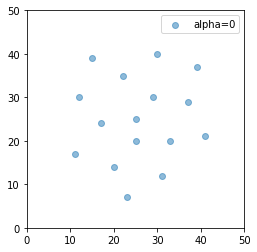

In [68]:
import numpy as np
import matplotlib.pyplot as plt


def sunflower(n: int, alpha: float) -> np.ndarray:
    # Number of points respectively on the boundary and inside the cirlce.
    n_exterior = np.round(alpha * np.sqrt(n)).astype(int)
    n_interior = n - n_exterior

    # Ensure there are still some points in the inside...
    if n_interior < 1:
        raise RuntimeError(f"Parameter 'alpha' is too large ({alpha}), all "
                           f"points would end-up on the boundary.")
    # Generate the angles. The factor k_theta corresponds to 2*pi/phi^2.
    k_theta = np.pi * (3 - np.sqrt(5))
    angles = np.linspace(k_theta, k_theta * n, n)

    # Generate the radii.
    r_interior = np.sqrt(np.linspace(0, 1, n_interior))
    r_exterior = np.ones((n_exterior,))
    r = np.concatenate((r_interior, r_exterior))

    # Return Cartesian coordinates from polar ones.
    return r * np.stack((np.cos(angles), np.sin(angles)))

    # NOTE: say the returned array is called s. The layout is such that s[0,:]
    # contains X values and s[1,:] contains Y values. Change the above to
    #   return r.reshape(n, 1) * np.stack((np.cos(angles), np.sin(angles)), axis=1)
    # if you want s[:,0] and s[:,1] to contain X and Y values instead.

L=50
if __name__ == '__main__':
    fig, ax = plt.subplots()

    # Let's plot three sunflowers with different values of alpha!
    for alpha in ([0]):
        s = sunflower(16, alpha)
        s=((3/4*(L/2)*s)+ L/2 +0.5)
        # NOTE: the 'alpha=0.5' parameter is to control transparency, it does
        # not have anything to do with the alpha used in 'sunflower' ;)
        ax.scatter(np.array(s[0],dtype=int),np.array(s[1],dtype=int), alpha=0.5, label=f"alpha={alpha}")
        ax.set_xlim([0,L])
        ax.set_ylim([0,L])

    # Display as square plot with equal axes and add a legend. Then show the result :)
    ax.set_aspect('equal')
    ax.legend()
    plt.show()

In [72]:
s = sunflower(16, alpha)
s_=((3/4*(L/2)*s)+ L/2 +0.5)

In [73]:
s

array([[-0.        ,  0.02257323,  0.22217046, -0.44037726,  0.43571336,
        -0.14988262, -0.2915032 ,  0.64167861, -0.67504655,  0.3283097 ,
         0.24436425, -0.74092261,  0.87356537, -0.53541636, -0.12415312,
         0.764649  ],
       [ 0.        , -0.25721026,  0.28978202, -0.07789654, -0.27716517,
         0.55755586, -0.56127167,  0.23434   ,  0.2786494 , -0.70157875,
         0.77907174, -0.4293798 , -0.1920509 ,  0.76157468, -0.95808107,
         0.64444698]])